In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('dataset/dataset.csv')

Declare a function to show a plot about a regression

In [63]:
def create_plot(x, y, locations, x_label, y_label, title, coeff, intercept, show_names):    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.scatter(x, y)

    plt.plot(x, coeff * x + intercept, color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if show_names:
        for i, txt in enumerate(locations):
            plt.annotate(txt[0], (x[i], y[i]), xytext=(x[i], y[i] + 0.005))

    plt.show()

# Simple regressions on custom performance index

We filter for wave 1

We define as **Performance Index** the following variable:

Setting indipendent variables

Performing multiple regression using **performance index** as the dependent variable

                                 OLS Regression Results                                 
Dep. Variable:     Performance index for wave 1   R-squared:                       0.218
Model:                                      OLS   Adj. R-squared:                  0.022
Method:                           Least Squares   F-statistic:                     1.114
Date:                          Sun, 30 Jan 2022   Prob (F-statistic):              0.382
Time:                                  11:22:42   Log-Likelihood:                 52.611
No. Observations:                            36   AIC:                            -89.22
Df Residuals:                                28   BIC:                            -76.55
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

/var/folders/cv/d353rzp16yl37xs9v7mdht3c0000gn/T/ipykernel_87497/3889404455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)


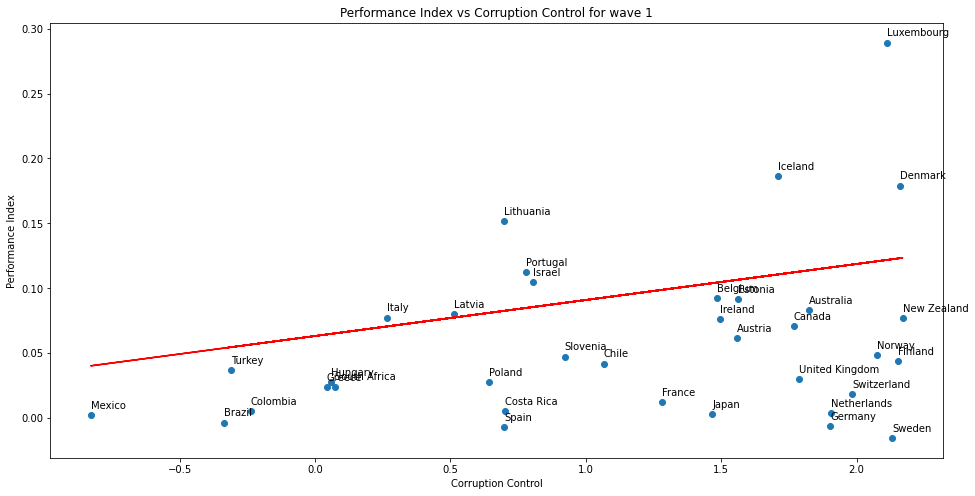

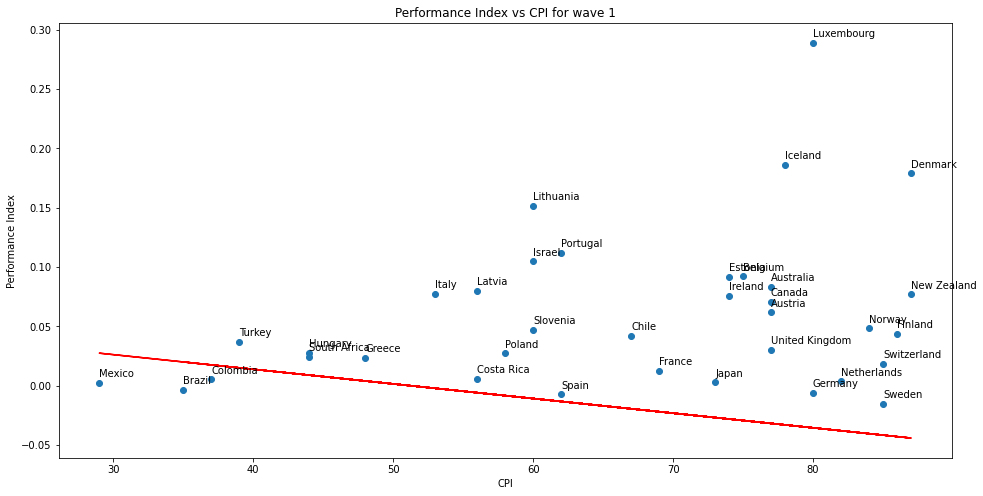

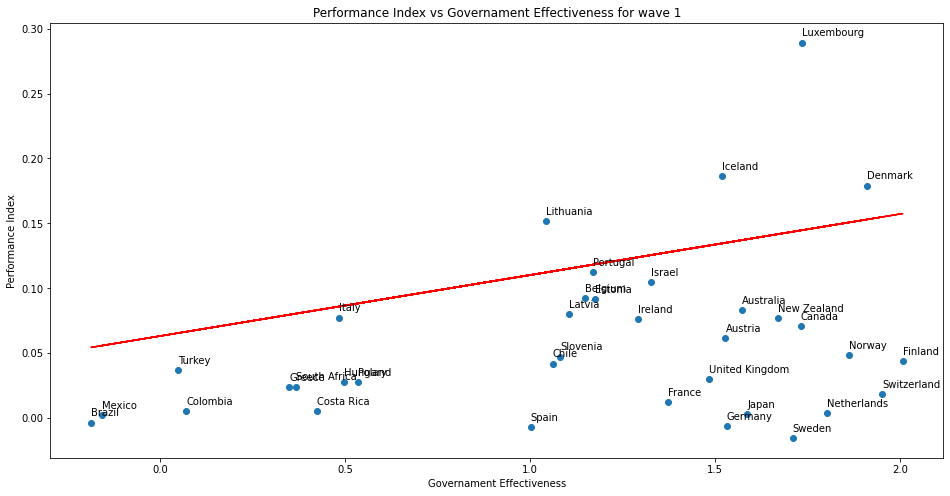

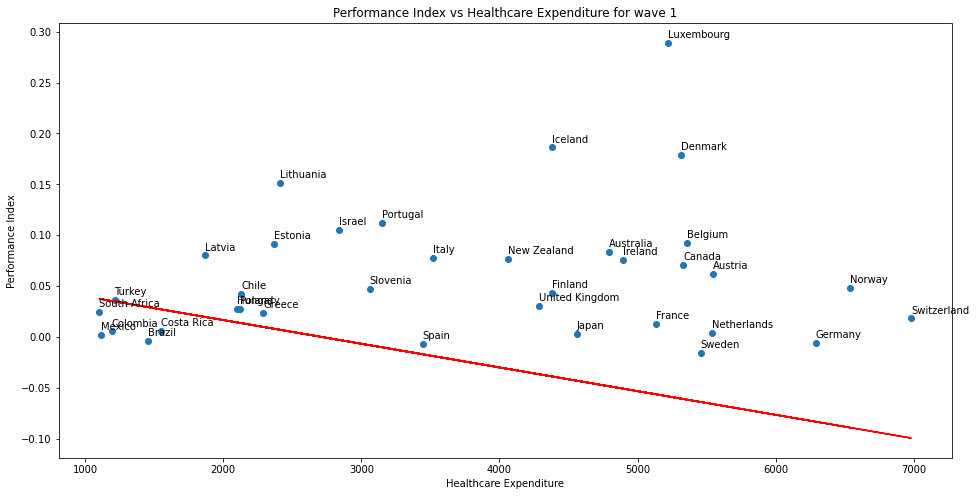

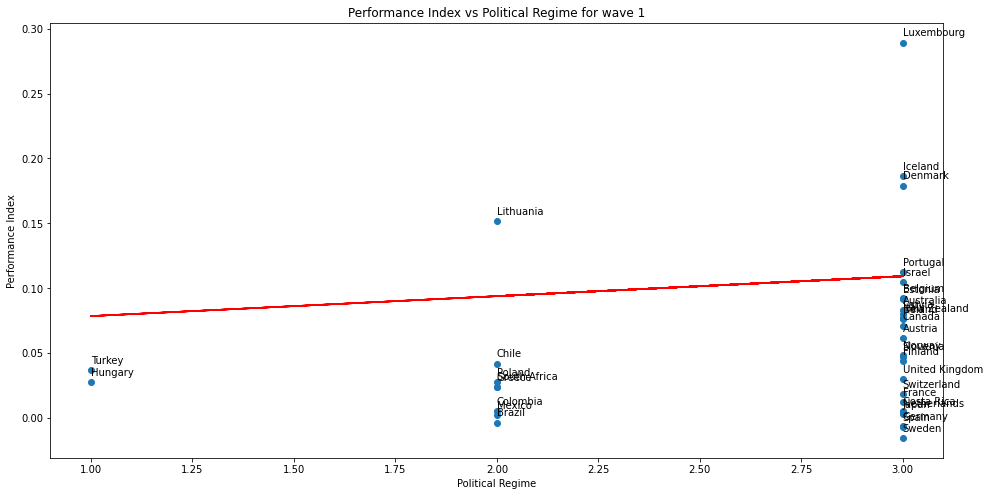

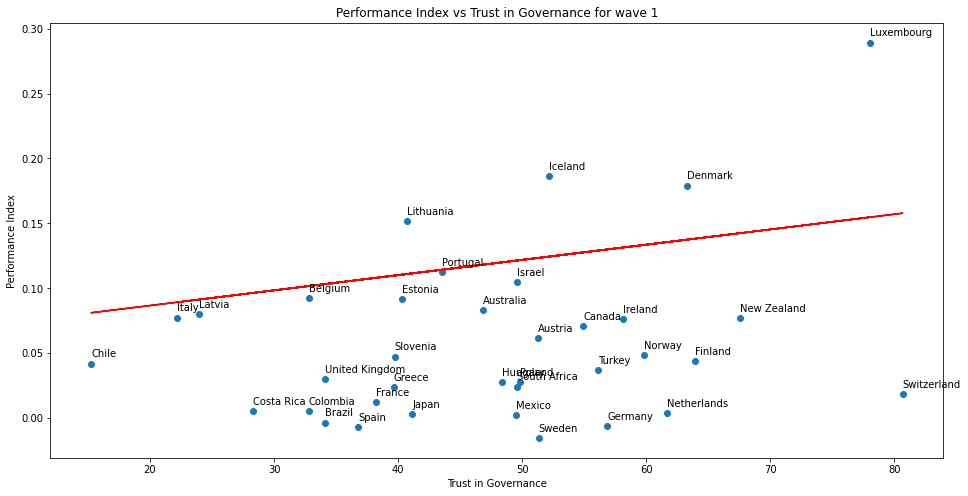

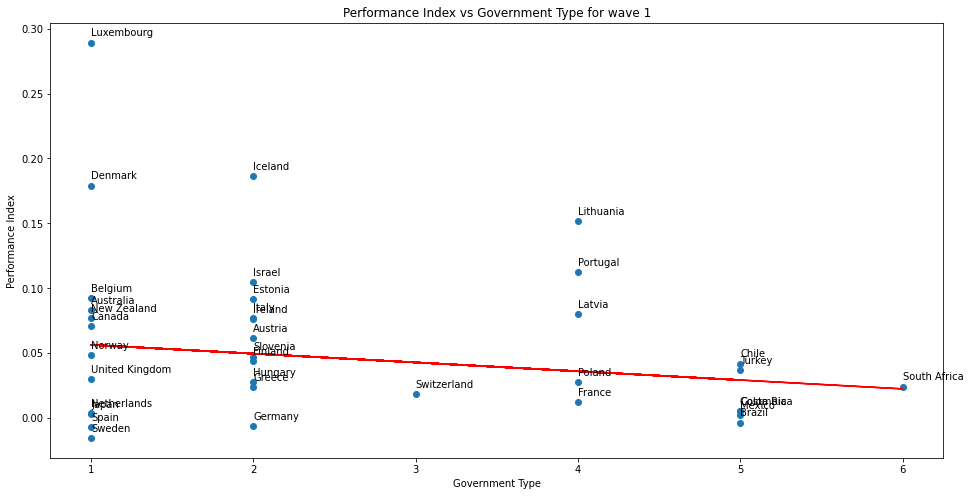

//////////////////////////////////////////////////////////////////////////////////////////////
                                 OLS Regression Results                                 
Dep. Variable:     Performance index for wave 2   R-squared:                       0.293
Model:                                      OLS   Adj. R-squared:                  0.116
Method:                           Least Squares   F-statistic:                     1.656
Date:                          Sun, 30 Jan 2022   Prob (F-statistic):              0.161
Time:                                  11:22:43   Log-Likelihood:                -5.3954
No. Observations:                            36   AIC:                             26.79
Df Residuals:                                28   BIC:                             39.46
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
               

/var/folders/cv/d353rzp16yl37xs9v7mdht3c0000gn/T/ipykernel_87497/3889404455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)


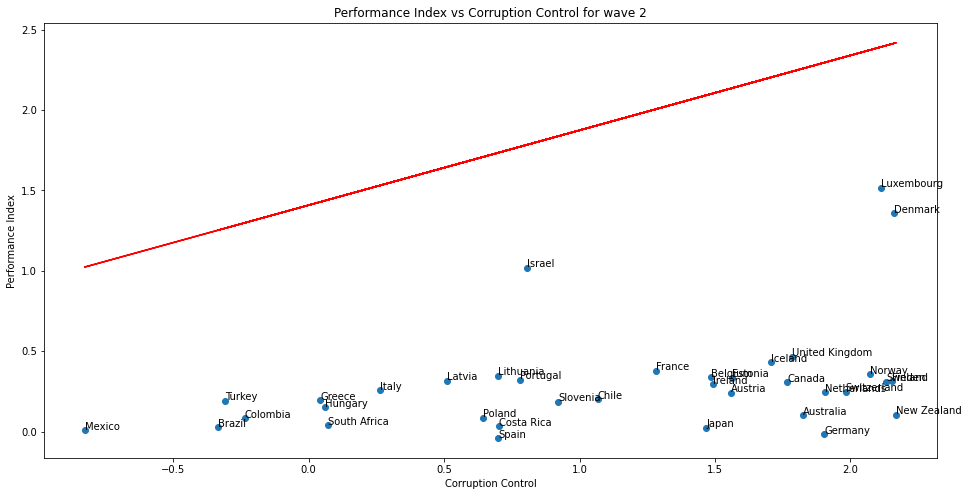

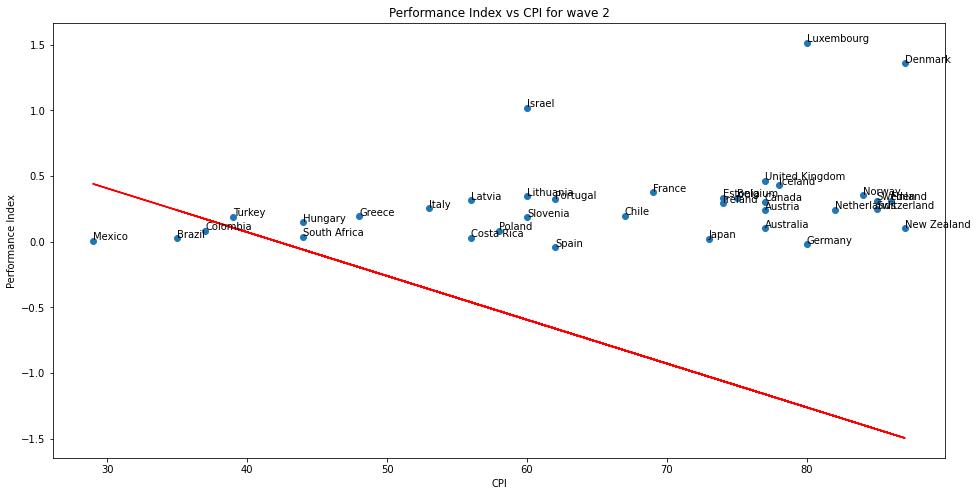

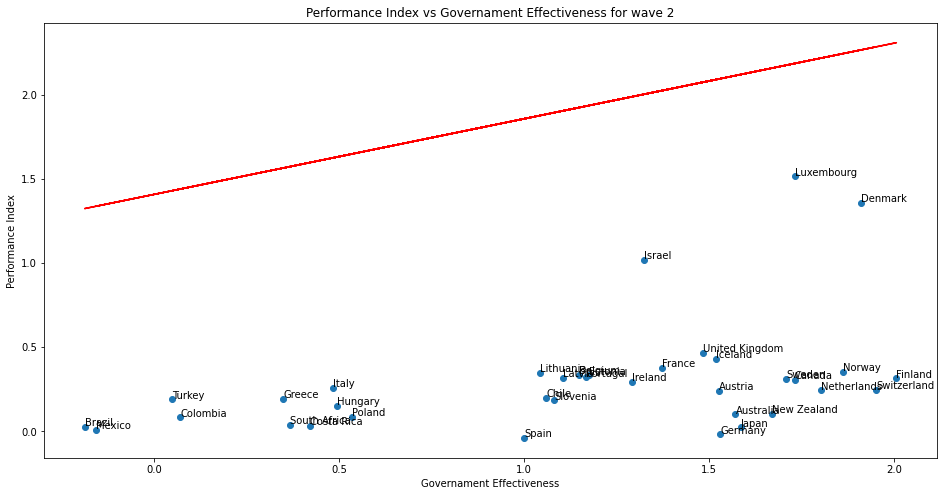

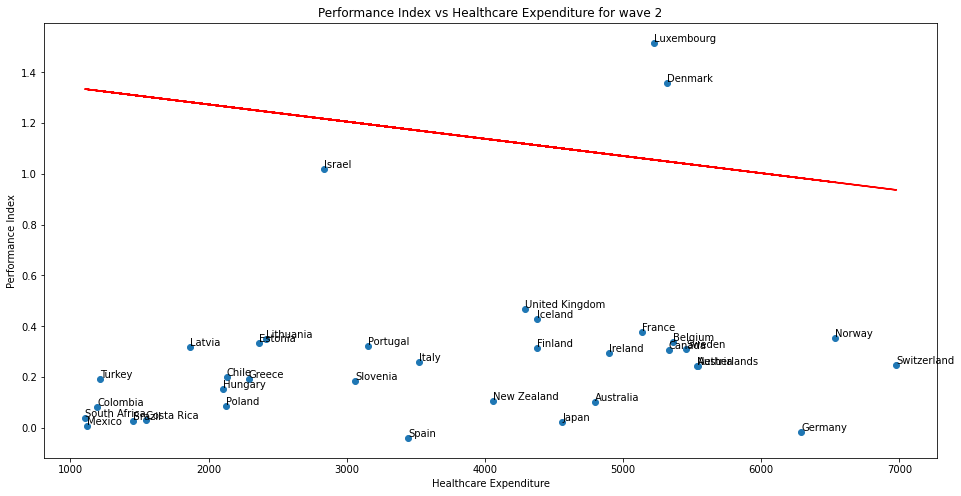

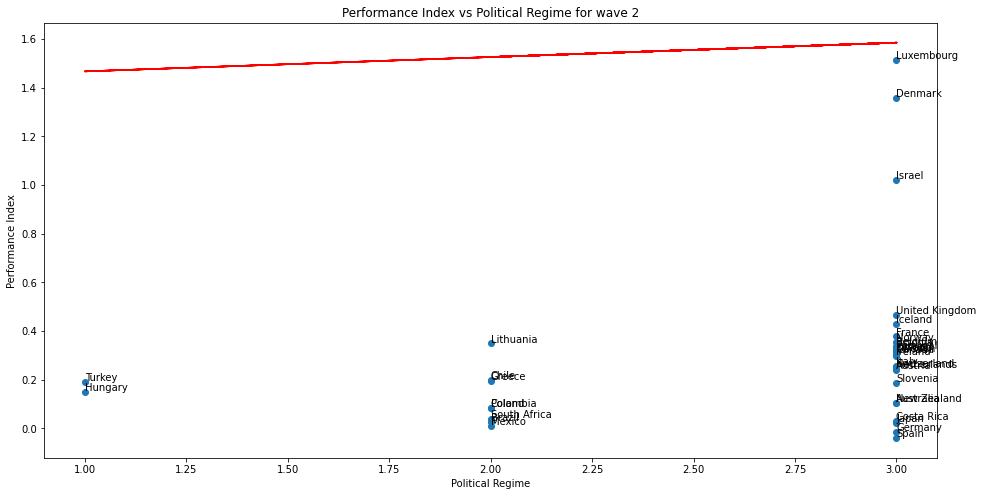

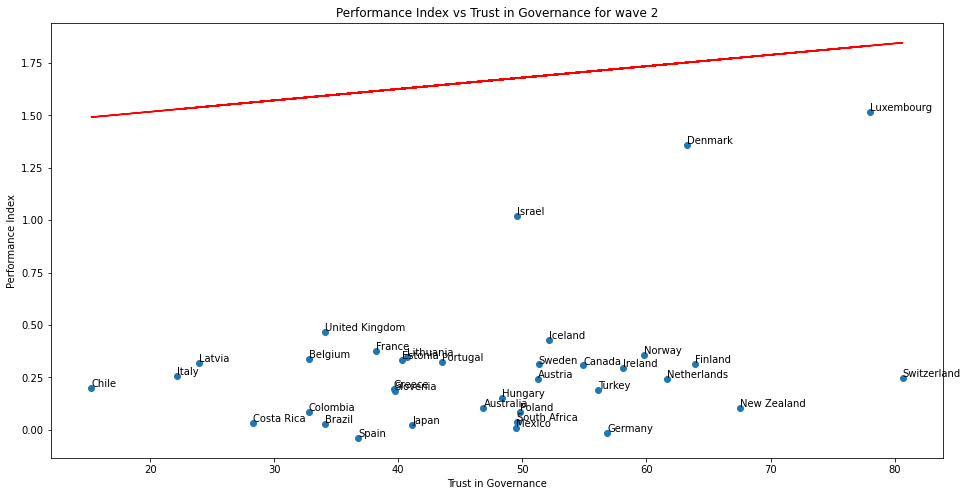

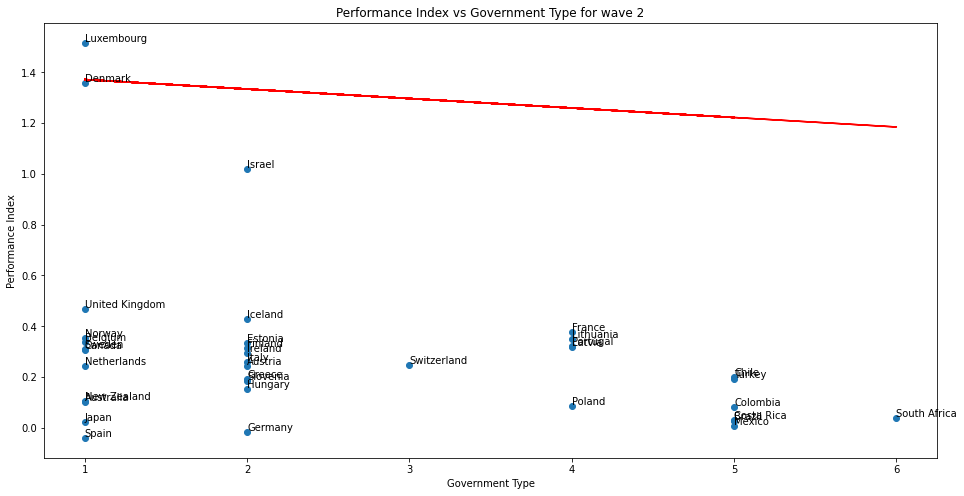

//////////////////////////////////////////////////////////////////////////////////////////////
                                 OLS Regression Results                                 
Dep. Variable:     Performance index for wave 3   R-squared:                       0.309
Model:                                      OLS   Adj. R-squared:                  0.137
Method:                           Least Squares   F-statistic:                     1.792
Date:                          Sun, 30 Jan 2022   Prob (F-statistic):              0.128
Time:                                  11:22:44   Log-Likelihood:                -65.315
No. Observations:                            36   AIC:                             146.6
Df Residuals:                                28   BIC:                             159.3
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
               

/var/folders/cv/d353rzp16yl37xs9v7mdht3c0000gn/T/ipykernel_87497/3889404455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)


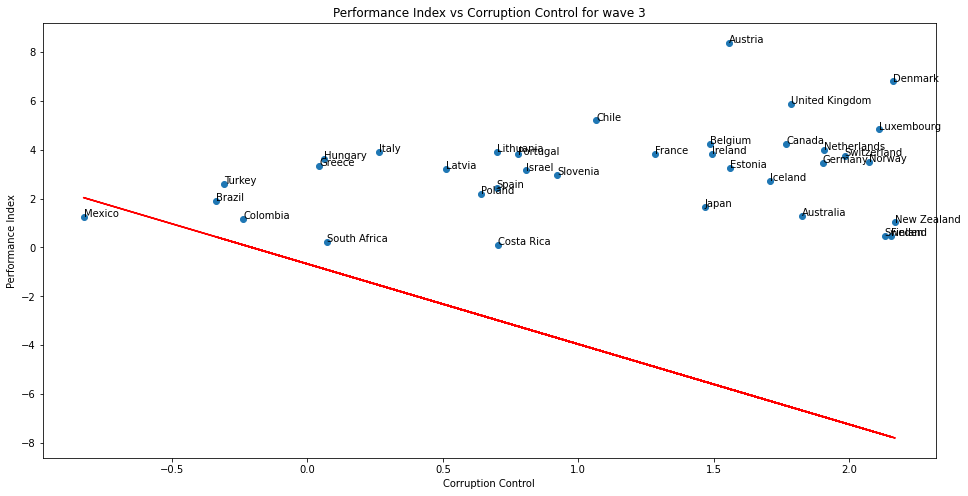

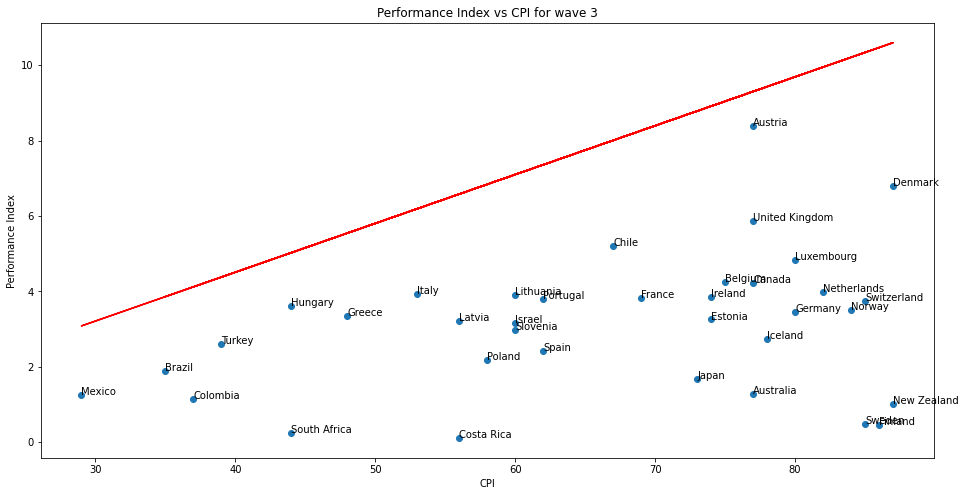

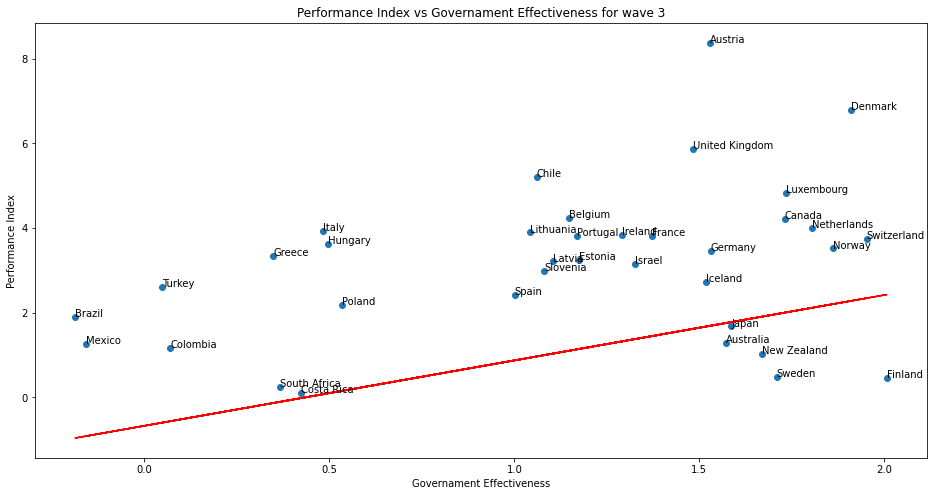

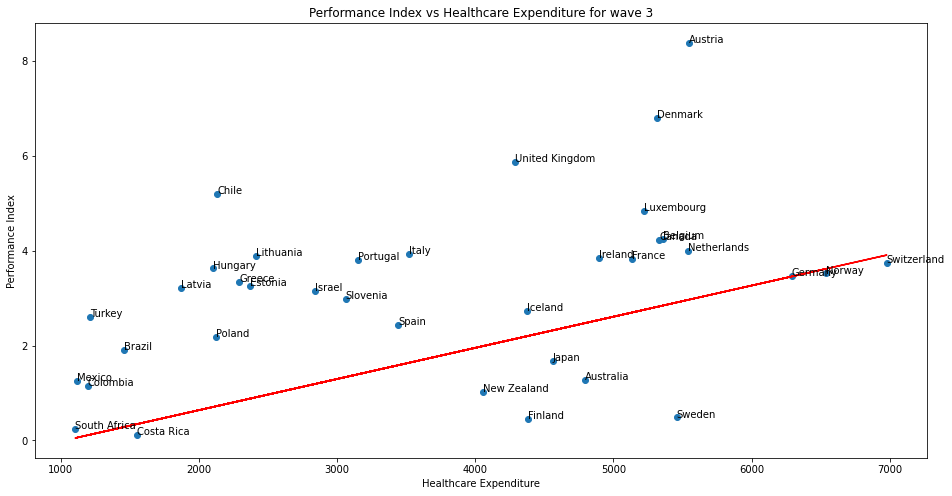

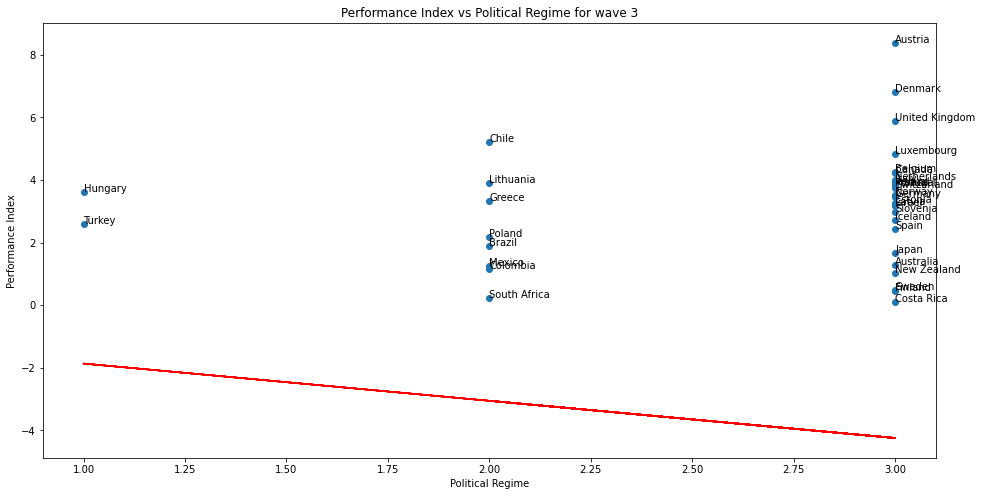

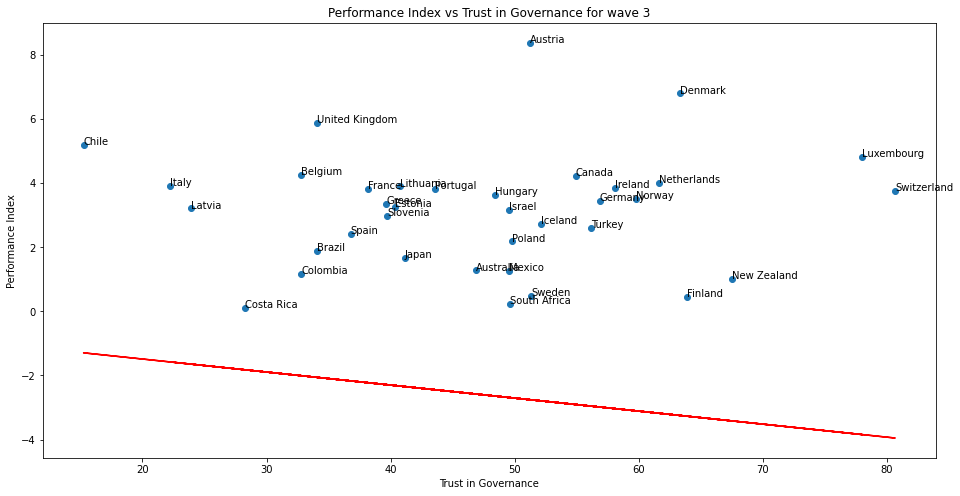

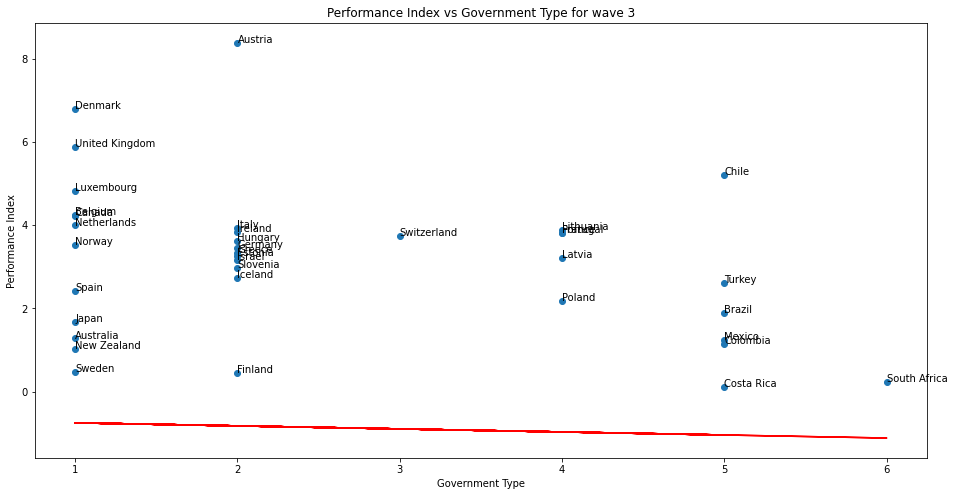

//////////////////////////////////////////////////////////////////////////////////////////////
                                 OLS Regression Results                                 
Dep. Variable:     Performance index for wave 4   R-squared:                       0.105
Model:                                      OLS   Adj. R-squared:                 -0.119
Method:                           Least Squares   F-statistic:                    0.4675
Date:                          Sun, 30 Jan 2022   Prob (F-statistic):              0.850
Time:                                  11:22:45   Log-Likelihood:                -57.118
No. Observations:                            36   AIC:                             130.2
Df Residuals:                                28   BIC:                             142.9
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
               

/var/folders/cv/d353rzp16yl37xs9v7mdht3c0000gn/T/ipykernel_87497/3889404455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)


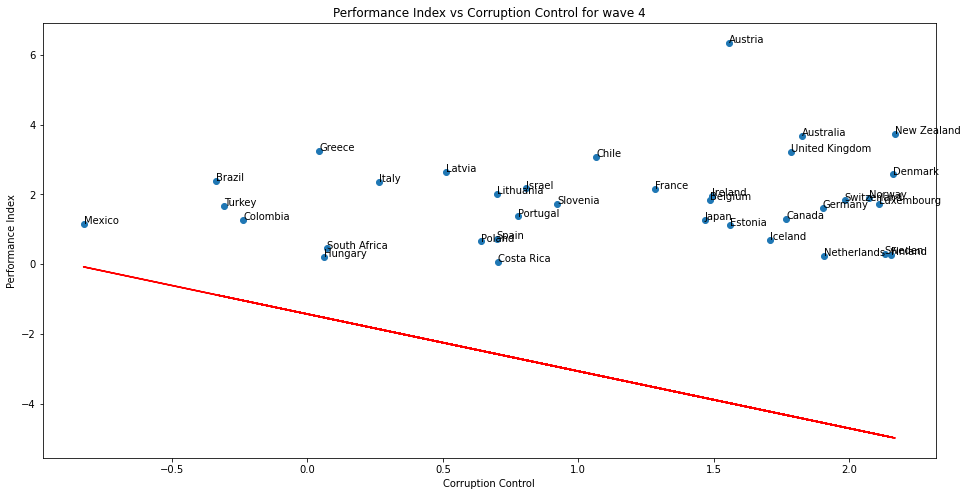

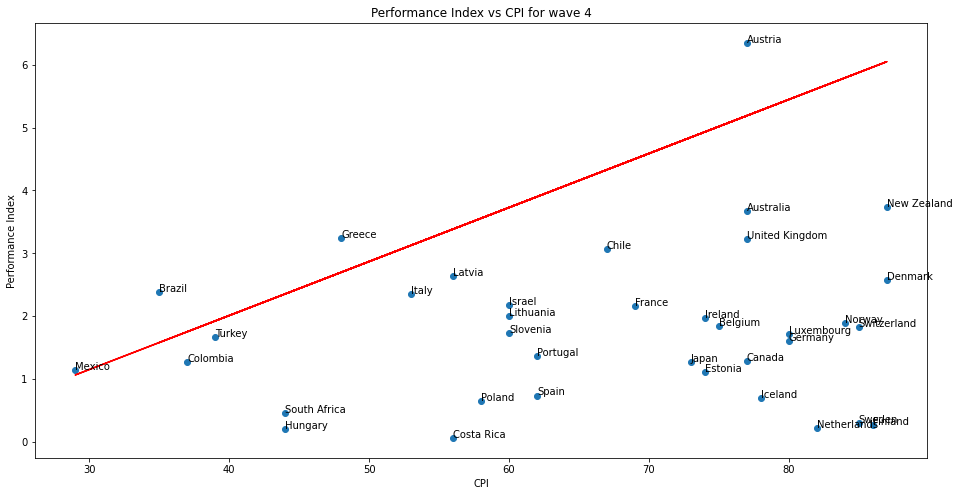

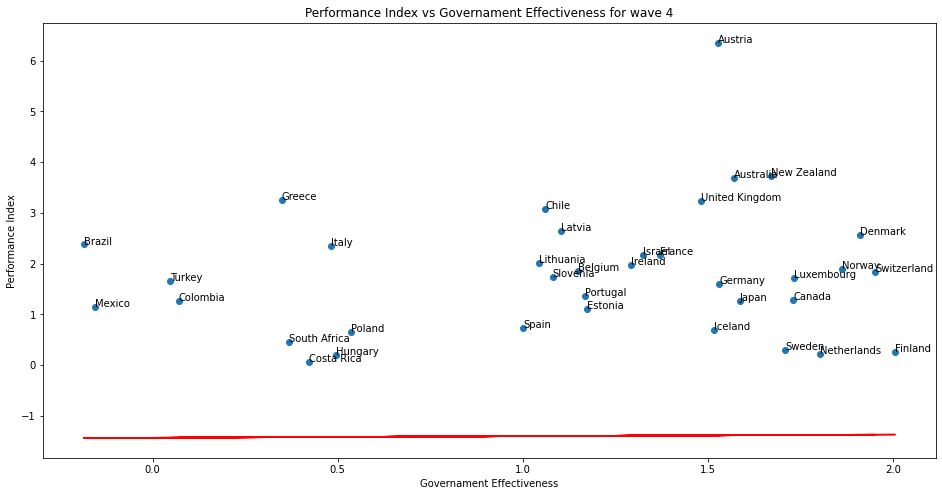

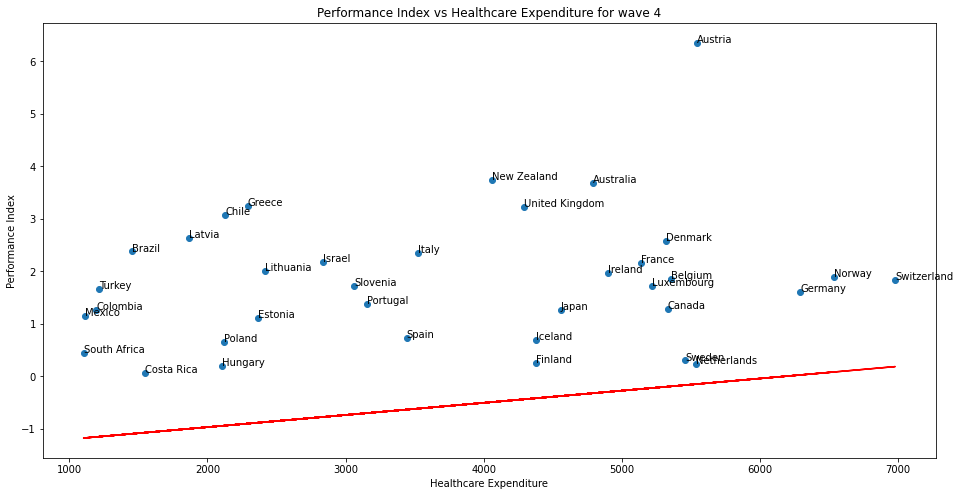

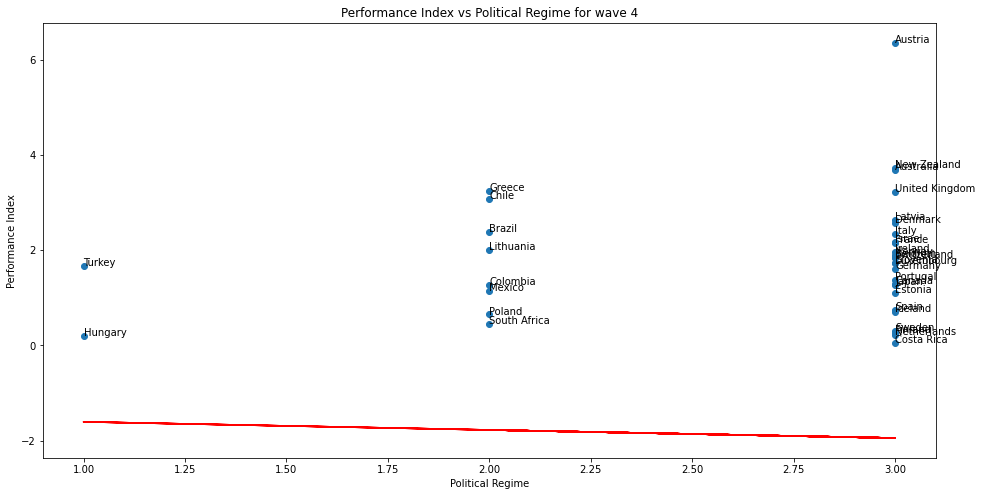

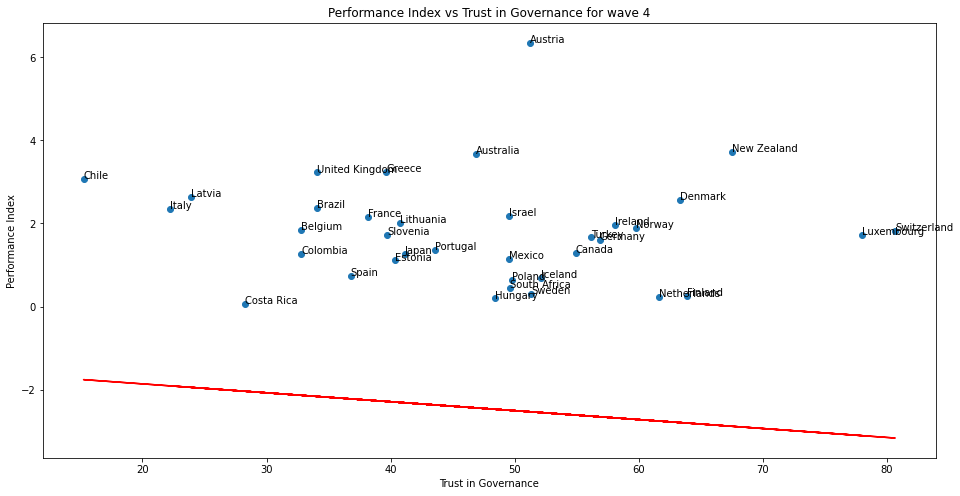

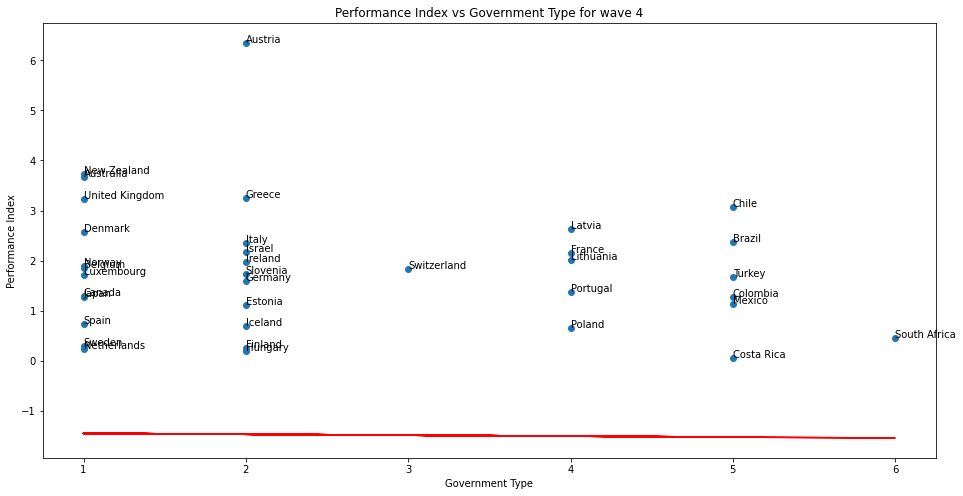

//////////////////////////////////////////////////////////////////////////////////////////////


In [65]:
show_names_in_plots = True

for wave in set(dataset['wave']):
    dataset_wave = dataset[dataset['wave'] == wave]

    new_cases_pc = (dataset_wave['new_cases'].values) / (dataset_wave['population'].values)
    new_deaths_pc = (dataset_wave['new_deaths'].values) / (dataset_wave['population'].values)
    new_tests_pc = (dataset_wave['new_tests'].values) / (dataset_wave['population'].values)
    new_vaccinations_pc = (dataset_wave['new_vaccinations'].values) / (dataset_wave['population'].values)
    icu_patients_pc = (dataset_wave['icu_patients'].values) / (dataset_wave['population'].values)

    dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)

    X = np.array([
        dataset_wave['corruption_control'].values, 
        dataset_wave['cpi'].values, 
        dataset_wave['governament_effectiveness'].values, 
        dataset_wave['healthcare_expenditure'].values, 
        dataset_wave['political_regime'].values, 
        dataset_wave['trust_in_governance'].values, 
        dataset_wave['government_type'].values
    ]).T

    X_names = [
        'Corruption Control', 
        'CPI', 
        'Governament Effectiveness', 
        'Healthcare Expenditure', 
        'Political Regime', 
        'Trust in Governance', 
        'Government Type'
    ]

    locations = np.array([
        dataset_wave['location'].values
    ]).T

    Y = dataset_wave['performance_index'].values

    model = LinearRegression().fit(X, Y)

    coeff = model.coef_
    intercept = model.intercept_
    X2 = sm.add_constant(X)

    est = sm.OLS(Y, X2)
    est2 = est.fit()

    print(est2.summary(
        xname=['Const'] + X_names,
        yname='Performance index for wave ' + str(wave)
    ))

    i = 0
    for x_variable in X.T:
        create_plot(x_variable, Y, locations, X_names[i], 'Performance Index', 'Performance Index vs {} for wave {}'.format(X_names[i], wave), coeff[i], intercept, show_names_in_plots)
        i += 1

    print('//////////////////////////////////////////////////////////////////////////////////////////////')
